In [120]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import json
import csv
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.util import bigrams
from google.colab import files
uploaded = files.upload()

Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107.json
Saving ver1_scrapedweb-1023.json to ver1_scrapedweb-1023.json
Saving ver1_scrapedweb-1024.json to ver1_scrapedweb-1024.json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025.json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026.json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027.json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030.json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031.json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032.json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033.json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034.json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035.json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036.json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037.json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063.json
Saving ver1_scrapedweb-1065.json to ver1_scrapedweb-1065.json
Saving ver

In [121]:
names = ["ver1_scrapedweb-107.json", "ver1_scrapedweb-1023.json", "ver1_scrapedweb-1024.json", 
             "ver1_scrapedweb-1025.json", "ver1_scrapedweb-1026.json", "ver1_scrapedweb-1027.json", 
             "ver1_scrapedweb-1030.json", "ver1_scrapedweb-1031.json", "ver1_scrapedweb-1032.json", 
             "ver1_scrapedweb-1033.json", "ver1_scrapedweb-1034.json", "ver1_scrapedweb-1035.json",
             "ver1_scrapedweb-1036.json", "ver1_scrapedweb-1037.json", "ver1_scrapedweb-1063.json", 
             "ver1_scrapedweb-1068.json", "ver1_scrapedweb-1070.json"]
data_list=[]
for i in names:
  data_list.append(uploaded[i].decode("utf-8"))
data_list

['{"text": ["Easy Halloween Painting | Adorable Witch Sisters In The Woods | #Lovefallart #Painting | The Art Sherpa", "canvas painting for beginners videos", " ", " ", " BEGINNER HOW TO PAINT art lesson \\" Adorable Witch Sisters in the woods \\" with a black cat in acrylic art tutorial. Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson . Full painting : ", "http://bit.ly/1RxdK2F", " traceable ", "http://bit.ly/22sgTCT", " The Creative Art Collaborations Presents Love a love of autumn and fall video art festival. Just use the hashtag to get your ticket for a sea of amazing creativity. Tons of artists have created art and craft videos for your fall viewing enjoyment ", "#lovefallart", " ", "#painting", " ", "#creativeartscollaboration", " Great for a private at HOME PAINTING PARTY with friends and family. This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours. This is a lot of fun and all

In [122]:
df_data1 = pd.DataFrame(zip(data_list, data_list),columns =['Raw_Text', 'Processed_Text'])
df_data1.head()

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","{""text"": [""Easy Halloween Painting | Adorable ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","{""text"": [""Unedited Photos That Show Just How ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","{""text"": [""Art | Thiel College"", ""Thiel Colleg..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","{""text"": ["" Watch Shrek Forever After (2010) -..."


In [123]:
for i in range(17):
  df_data1['Processed_Text'].values[i] = (re.sub(r"\W", " ", df_data1['Processed_Text'].values[i]))
  df_data1['Processed_Text'].values[i] = (re.sub(r" n ", " ", df_data1['Processed_Text'].values[i]))
  df_data1['Processed_Text'].values[i] = (re.sub(r" t ", " ", df_data1['Processed_Text'].values[i]))
  df_data1['Processed_Text'].values[i] = (re.sub(r" r ", " ", df_data1['Processed_Text'].values[i]))
  df_data1['Processed_Text'].values[i] = " ".join(df_data1['Processed_Text'].values[i].split())
  df_data1['Processed_Text'].values[i] = df_data1['Processed_Text'].values[i].split(' ', 1)[1]
df_data1.head(17)

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...",Easy Halloween Painting Adorable Witch Sisters...
1,"{""text"": [""Unedited Photos That Show Just How ...",Unedited Photos That Show Just How Crazy The P...
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...",Watch ABC6 Watch ABC6 online Main Navigation E...
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...",Art Thiel College Thiel College fine art minor...
4,"{""text"": ["" Watch Shrek Forever After (2010) -...",Watch Shrek Forever After 2010 Streaming t t t...
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...",Manual de can u00e7 u00f5es de 28 Abr 2021 RTP...
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...",FORCE OF FEELING Chapter 1 ManhuaScan Read FOR...
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...",tIdhi Nadhi Movie Pooja Ceremony Image 40 A ne...
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...",DOWNLOAD DeJ Loaf Tap In feat 42 Dugg Sada Bab...
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...",Friday Funday Visit Sarasota It u2019s Friday ...


In [124]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('n')
stop.append('r')
lem = WordNetLemmatizer()
stem = PorterStemmer()
for i in range(17):
   x = df_data1['Processed_Text'].values[i]
   token = nltk.word_tokenize(x)
   df_data1['Processed_Text'].values[i] = token
   c = [t for t in token if not t in stop]
   df_data1['Processed_Text'].values[i] = c
df_data1.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[Easy, Halloween, Painting, Adorable, Witch, S..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[Unedited, Photos, That, Show, Just, How, Craz..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[Watch, ABC6, Watch, ABC6, online, Main, Navig..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[Art, Thiel, College, Thiel, College, fine, ar..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[Watch, Shrek, Forever, After, 2010, Streaming..."


In [125]:
for x in range(17):
  z = []
  y = df_data1['Processed_Text'].values[x]
  for j in y:
    z.append(stem.stem(j))
  df_data1['Processed_Text'].values[x] = z
df_data1.head()

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easi, halloween, paint, ador, witch, sister, ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit, photo, that, show, just, how, crazi, ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch, abc6, watch, abc6, onlin, main, navig,..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art, thiel, colleg, thiel, colleg, fine, art,..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch, shrek, forev, after, 2010, stream, t6,..."


In [126]:
nltk.download('wordnet')
for x in range(17):
  z = []
  y = df_data1['Processed_Text'].values[x]
  for j in y:
    z.append(lem.lemmatize(j))
  df_data1['Processed_Text'].values[x] = z
df_data1.head(17)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easi, halloween, paint, ador, witch, sister, ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit, photo, that, show, just, how, crazi, ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch, abc6, watch, abc6, onlin, main, navig,..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art, thiel, colleg, thiel, colleg, fine, art,..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch, shrek, forev, after, 2010, stream, t6,..."
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...","[manual, de, u00e7, u00f5, de, 28, abr, 2021, ..."
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...","[forc, OF, feel, chapter, 1, manhuascan, read,..."
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...","[tidhi, nadhi, movi, pooja, ceremoni, imag, 40..."
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...","[download, dej, loaf, tap, In, feat, 42, dugg,..."
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...","[friday, funday, visit, sarasota, It, u2019, f..."


In [127]:
for i in range(10):
  x = df_data1['Processed_Text'].values[i]
  b =nltk.bigrams(x)
  z=[" ".join(t) for t in b]
  df_data1['Processed_Text'].values[i] = z
df_data1.head()

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easi halloween, halloween paint, paint ador, ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit photo, photo that, that show, show jus..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch abc6, abc6 watch, watch abc6, abc6 onli..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art thiel, thiel colleg, colleg thiel, thiel ..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch shrek, shrek forev, forev after, after ..."


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
for i in range(10):
  y = df_data1['Processed_Text'].values[i]
  print("\nIDF values of Text Document no.", i)
  result = tfidf.fit_transform(y)
  for a, b in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(a, ':', b)
  print('\nWord Indexing')
  print(tfidf.vocabulary_)
  print("\nTF-IDF values of Text document no.", i)
  print(result)


IDF values of Text Document no. 0
10 : 5.296529262515467
100 : 6.395141551183577
12 : 5.296529262515467
15 : 6.395141551183577
15cm : 5.884315927417586
16 : 6.395141551183577
16x20 : 6.395141551183577
17 : 6.395141551183577
18 : 6.395141551183577
18cm : 6.395141551183577
19cm : 6.395141551183577
1rxdk2f : 6.395141551183577
20 : 5.884315927417586
20cm : 5.547843690796373
21cm : 6.395141551183577
22sgtct : 6.395141551183577
23cm : 6.395141551183577
25cm : 5.296529262515467
29 : 5.884315927417586
30 : 5.547843690796373
30cm : 5.884315927417586
38cm : 6.395141551183577
41cm : 5.884315927417586
42cm : 5.884315927417586
45 : 6.395141551183577
4cm : 6.395141551183577
51 : 6.395141551183577
51cm : 6.395141551183577
59 : 6.395141551183577
5cm : 6.395141551183577
600 : 6.395141551183577
76cm : 6.395141551183577
7cm : 5.884315927417586
a2 : 6.395141551183577
a3 : 6.395141551183577
a4 : 6.395141551183577
access : 6.395141551183577
acryl : 3.938405778362273
actual : 6.395141551183577
ad : 6.395141

In [129]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.models import CoherenceModel

In [130]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    LDA = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,num_topics=k, random_state=100,chunksize=100,passes=10,alpha=a,eta=b)
    coherence_lda = CoherenceModel(model=lda_model, texts=df_BoW, dictionary=id2word, coherence='c_v')
    return coherence_lda.get_coherence()

In [131]:
data2 = df_data1['Processed_Text']
id2word = corpora.Dictionary(data2)
temp = data2
corpus = [id2word.doc2bow(text) for text in temp]
LDA = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=12, random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
print(LDA.print_topics())
k = LDA[corpus]

[(0, '0.010*"yanni u2013" + 0.010*"album yanni" + 0.006*"thiel colleg" + 0.005*"In feat" + 0.005*"dugg sada" + 0.005*"feat 42" + 0.005*"42 dugg" + 0.005*"sada babi" + 0.004*"tap In" + 0.003*"art program"'), (1, '0.010*"read more" + 0.005*"pooja check" + 0.005*"new read" + 0.005*"news read" + 0.005*"photo news" + 0.005*"pooja ceremoni" + 0.005*"nadhi launch" + 0.005*"view more" + 0.005*"tidhi nadhi" + 0.005*"new film"'), (2, '0.001*"album yanni" + 0.001*"yanni u2013" + 0.001*"acryl paint" + 0.000*"friday night" + 0.000*"dugg sada" + 0.000*"art lesson" + 0.000*"feat 42" + 0.000*"sada babi" + 0.000*"morai O" + 0.000*"In feat"'), (3, '0.001*"art lesson" + 0.001*"acryl paint" + 0.001*"art sherpa" + 0.001*"art journey" + 0.001*"acryl fun" + 0.001*"video art" + 0.001*"paint lesson" + 0.001*"paint parti" + 0.001*"home paint" + 0.001*"paint medium"'), (4, '0.001*"album yanni" + 0.001*"yanni u2013" + 0.001*"friday night" + 0.000*"feat 42" + 0.000*"sada babi" + 0.000*"dugg sada" + 0.000*"42 dugg"

In [132]:
print('\nPerplexity: ', LDA.log_perplexity(corpus)) 
coherence_lda = CoherenceModel(model=LDA, texts=data2, dictionary=id2word, coherence='c_v')
coherence= coherence_lda.get_coherence()
print('\nCoherence Score: ', coherence)


Perplexity:  -8.064882645231497

Coherence Score:  0.5541621479049883


In [133]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [134]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data2, start=2, limit=50, step=1)

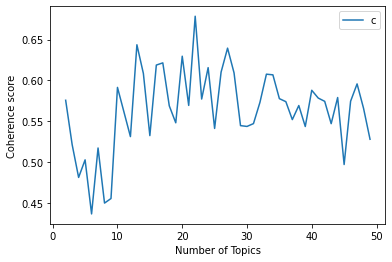

In [135]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for q, t in zip(x, coherence_values):
    print("Num Topics =", q, " has Coherence Value of", round(t, 2))

#After analyzing, maximum coherence score is obtained when number of topics is 22

In [137]:
Best_model = model_list[22]
model_topics = Best_model.show_topics(formatted=False)
Best_model.print_topics(num_words=10)

[(17,
  '0.005*"virtual" + 0.004*"pm" + 0.004*"yanni u2013" + 0.004*"album yanni" + 0.004*"antonio" + 0.003*"sky" + 0.003*"space" + 0.003*"day" + 0.003*"planet" + 0.003*"planetarium"'),
 (14,
  '0.009*"samantha" + 0.007*"grandnadawalk" + 0.007*"u2019" + 0.007*"u201d" + 0.005*"000" + 0.005*"competit" + 0.004*"friday night" + 0.004*"queen" + 0.004*"miss" + 0.004*"preliminari"'),
 (19,
  '0.017*"deliveri" + 0.017*"knight" + 0.017*"47" + 0.017*"chapter" + 0.012*"manhuascan" + 0.006*"read" + 0.006*"2018" + 0.006*"onlin" + 0.006*"com" + 0.006*"u00a9"'),
 (4,
  '0.009*"noticia" + 0.009*"subnacional" + 0.006*"album yanni" + 0.006*"yanni u2013" + 0.005*"relacionada" + 0.005*"con" + 0.005*"unitel" + 0.005*"de" + 0.004*"friday night" + 0.003*"dugg sada"'),
 (12,
  '0.003*"album yanni" + 0.003*"yanni u2013" + 0.003*"acryl paint" + 0.003*"friday night" + 0.003*"art lesson" + 0.002*"42 dugg" + 0.002*"It u2019" + 0.002*"dugg sada" + 0.001*"In feat" + 0.001*"feat 42"'),
 (15,
  '0.009*"malibu" + 0.007

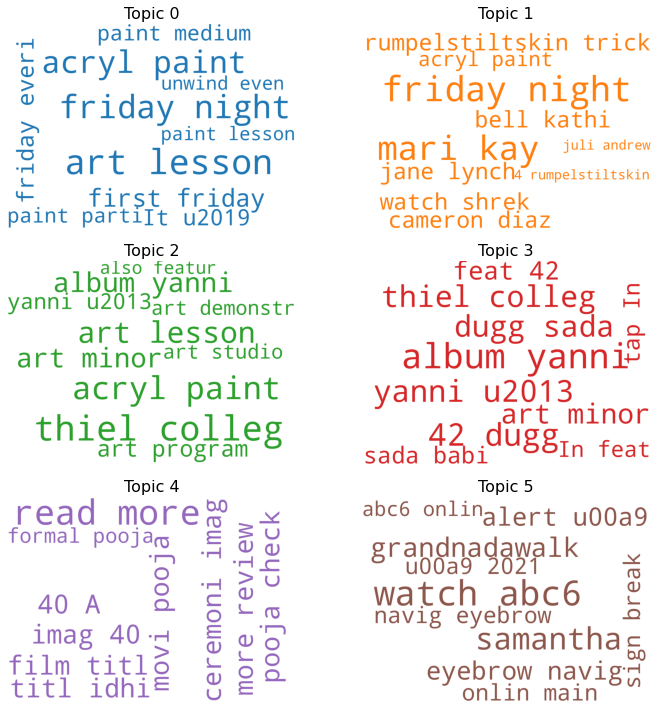

In [138]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
Word_cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='black',
                  color_func=lambda *args, **kwargs: cols[i])

topics = Best_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=20, hspace=20)
plt.axis('off')
plt.margins(x=10, y=10)
plt.tight_layout()
plt.show()


In [142]:
print('Perplexity : ', Best_model.log_perplexity(corpus), )
coherence_model_lda = CoherenceModel(model=Best_model, texts=data2, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity :  -13.840030014763746

Coherence Score:  0.6156546368184587
